In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('data/labeledTrainData.tsv', delimiter='\t', quoting=3)
# 레이블이 없는 테스트 데이터
test = pd.read_csv('data/testData.tsv', delimiter='\t', quoting=3)
print(train.shape)
print(test.shape)

(25000, 3)
(25000, 2)


In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
#pip install BeautifulSoup4

In [ ]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train['review'][0], "html5lib")
print(train['review'][0][:700])
example1.get_text()[:700]

In [ ]:
# 정규표현식을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

In [ ]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()

# 문자를 나눈다. => 토큰화
words = lower_case.split()
words[:10]

In [ ]:
# 텍스트 데이터 전처리를 위해 다음을 다운로드 해야함
# nltk.download('stopwords')
import nltk
nltk.download('wordnet')

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

In [ ]:
# stopwords 를 제거한 토큰들
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

stemmer = SnowballStemmer('english')
p_stemmer = PorterStemmer()

words = [p_stemmer.stem(w) for w in words]
words[:10]

In [21]:
def review_to_words( raw_review ):
    # 1. HTML 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. 소문자 변환
    words = letters_only.lower().split()
    # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    stops = set(stopwords.words('english'))
    # 5. stopwords 를 세트로 변환한다.
    meaningful_words = [ w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return(' '.join(stemming_words))

In [22]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [23]:
# 전체 Train data review에 적용
%time train['review_clean'] = train['review'].apply(review_to_words)
clean_train_reviews = train['review_clean']

Wall time: 54.9 s


In [24]:
# 전체 Test data review에 적용
%time test['review_clean'] = test['review'].apply(review_to_words)
clean_test_reviews = test['review_clean']

Wall time: 53.5 s


In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

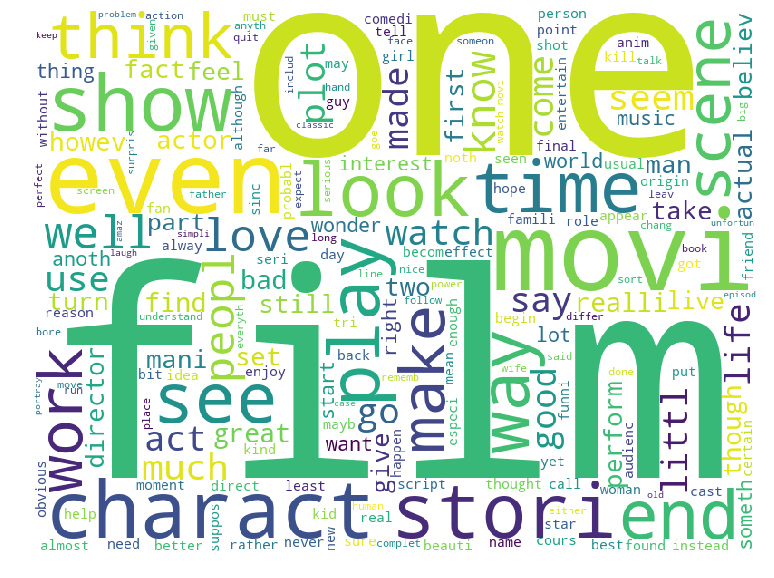

Wall time: 18.7 s


In [27]:
# 학습 데이터의 모든 단어에 대한 워드 클라우드를 그려본다.
%time displayWordCloud(' '.join(clean_train_reviews))

In [30]:
# 단어 수
train['num_words'] = clean_train_reviews.apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
train['num_unique_words'] = clean_train_reviews.apply\
                                        (lambda x: len(set(str(x).split())))

In [32]:
train.head()

,id,sentiment,review,review_clean,num_words,num_unique_words
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff go moment mj start listen music watch od...,219,156
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",classic war world timothi hine entertain film ...,84,63
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film start manag nichola bell give welcom inve...,240,201
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assum prais film greatest film opera ever...,189,158
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbl trashi wondrous unpretenti exploit hoo...,210,188


Text(0.5, 1.0, 'num_unique_words')

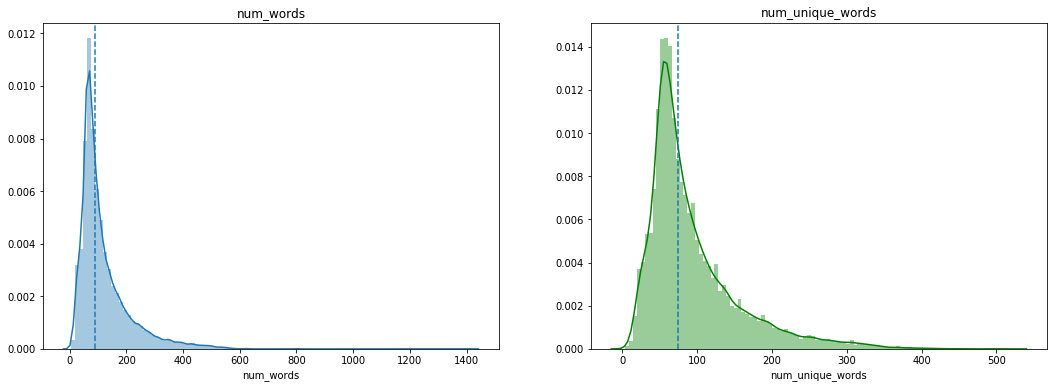

In [35]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('num_words')

sns.distplot(train['num_unique_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_unique_words'].median(), linestyle='dashed')
axes[1].set_title('num_unique_words')

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라메터 값을 수정
# 파라메터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),  # 단어를 몇 개씩 묶어서
                             max_features = 20000  # 가방에 토큰을 최대 몇 개까지
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [37]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.
# pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.
pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [40]:
# clean_train_review를 vectorize하시오.
%time train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features


Wall time: 26 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2762268 stored elements in Compressed Sparse Row format>

In [41]:
train_data_features.shape

(25000, 20000)

In [42]:
type(train_data_features)

scipy.sparse.csr.csr_matrix

In [43]:
type(np.array(train_data_features))

numpy.ndarray

In [44]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [ ]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

In [46]:
train_data_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
pd.DataFrame(train_data_features.toarray(), columns=vocab).head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi bloodbath,zombi film,zombi flick,zombi movi,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.ensemble import RandomForestClassifier

# 예측모델을 만들고, 훈련시키고, 모델을 평가하시오 - classification_report

rfc = RandomForestClassifier(n_estimators = 100)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rfc.fit(train_data_features, train['sentiment'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
test_data_features = vectorizer.fit_transform(clean_test_reviews)

In [51]:
predictions = rfc.predict(test_data_features)
predictions

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [52]:
predictions = rfc.predict(train_data_features)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(predictions, train['sentiment']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

   micro avg       1.00      1.00      1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

